In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import math
import numpy as np

from ipynb.fs.full.UtilCollections import SEASONS, PARAMS
from ipynb.fs.full.UtilFunctions import format_season, mean, growth_rate

In [16]:
pylab.rcParams.update(PARAMS)

In [4]:
def get_csvs_by_season(season):
    first_year, second_year = format_season(season)
    
    player_df = pd.read_csv("DataCollection/Player_Stats/player_stats_{0}-{1}.csv".format(first_year, second_year))
    team_df = pd.read_csv("DataCollection/Team_Stats/team_stats_{0}-{1}.csv".format(first_year, second_year))
    adv_team_df = pd.read_csv("DataCollection/Advanced_Team_Stats/adv_team_stats_{0}-{1}.csv".format(first_year, second_year))
    
    return player_df, team_df, adv_team_df

In [5]:
player_dfs, team_dfs, adv_team_dfs = [], [], []

for season in SEASONS:
    player_df, team_df, adv_team_df = get_csvs_by_season(season)
    player_dfs.append(player_df)
    team_dfs.append(team_df)
    adv_team_dfs.append(adv_team_df)

In [9]:
avg_off_ratings = []
avg_def_ratings = []

for i in range(len(SEASONS)):
    off_ratings = adv_team_dfs[i]["ORtg"]
    def_ratings = adv_team_dfs[i]["DRtg"]
    
    avg_off_ratings.append(round(mean(off_ratings), 2))
    avg_def_ratings.append(round(mean(def_ratings), 2))
    
print(avg_off_ratings)
print(avg_def_ratings)

[104.05, 103.03, 104.51, 103.63, 102.91, 106.07, 106.21, 106.44, 107.48, 108.26, 107.58, 107.26, 104.59, 105.84, 106.65, 105.64, 106.39, 108.81, 108.62, 110.4, 110.5, 112.35]
[104.04, 103.01, 104.53, 103.62, 102.89, 106.07, 106.2, 106.43, 107.47, 108.23, 107.55, 107.23, 104.6, 105.84, 106.64, 105.65, 106.39, 108.78, 108.61, 110.4, 110.68, 112.33]


In [10]:
adv_team_dfs[1]

,Team,Age,W,L,PW,PL,MOV,SOS,SRS,ORtg,...,Off_ORB%,Off_FT/FGA,Def_eFG%,Def_TOV%,Def_DRB%,Def_FT/FGA,Arena,Attend.,Attend./G,Made_Playoffs
0,SAS,29.5,58.0,24.0,63,19,7.76,0.16,7.92,106.6,...,27.1,0.267,0.444,12.9,73.7,0.182,Alamodome,913176,22273,True
1,SAC,27.1,55.0,27.0,57,25,5.82,0.25,6.07,105.6,...,27.2,0.230,0.460,14.5,70.7,0.181,ARCO Arena (II),709997,17317,True
2,UTA,32.0,53.0,29.0,55,27,4.70,0.31,5.00,107.6,...,30.2,0.273,0.473,15.6,73.2,0.301,Delta Center,792196,19322,True
3,PHI,28.2,56.0,26.0,54,28,4.28,-0.65,3.64,103.6,...,31.2,0.262,0.460,14.5,72.5,0.186,First Union Center,805692,19651,True
4,POR,30.1,50.0,32.0,53,29,4.20,0.33,4.52,106.5,...,30.0,0.225,0.470,14.3,72.4,0.223,Rose Garden Arena,831376,20277,True
5,DAL,26.6,53.0,29.0,53,29,4.28,0.32,4.61,107.1,...,24.1,0.231,0.467,14.2,70.7,0.244,Reunion Arena,680238,16591,True
6,MIL,28.2,52.0,30.0,52,30,3.88,-0.74,3.14,108.8,...,28.1,0.217,0.473,14.4,71.1,0.253,Bradley Center,683125,16662,True
7,LAL,29.2,56.0,26.0,51,31,3.38,0.37,3.74,108.4,...,31.1,0.238,0.468,12.2,72.5,0.234,STAPLES Center,776336,18935,True
8,NYK,29.8,48.0,34.0,50,32,2.63,-0.65,1.98,101.2,...,24.2,0.222,0.453,14.7,74.3,0.240,Madison Square Garden (IV),810283,19763,True
9,MIA,30.9,50.0,32.0,48,34,2.29,-0.57,1.73,101.1,...,24.3,0.227,0.460,15.3,72.7,0.214,AmericanAirlines Arena,678186,16541,True


In [12]:
diffs_rtg = []
avg_off_rtgs_playoffs = []
avg_def_rtgs_playoffs = []
avg_off_rtgs_non_playoffs = []
avg_def_rtgs_non_playoffs = []

for i in range(len(SEASONS)):
    off_rating_playoff_teams = []
    def_rating_playoff_teams = []
    off_rating_non_playoff_teams = []
    def_rating_non_playoff_teams = []
    for index, row in adv_team_dfs[i].iterrows():
        if row["Made_Playoffs"] == True:
            off_rating_playoff_teams.append(row["ORtg"])
            def_rating_playoff_teams.append(row["DRtg"])
        elif row["Made_Playoffs"] == False:
            off_rating_non_playoff_teams.append(row["ORtg"])
            def_rating_non_playoff_teams.append(row["DRtg"])
            
    avg_playoff_o = mean(off_rating_playoff_teams)
    avg_playoff_d = mean(def_rating_playoff_teams)
    
    avg_off_rtgs_playoffs.append(avg_playoff_o)
    avg_def_rtgs_playoffs.append(avg_playoff_d)
    
    avg_non_playoff_o = mean(off_rating_non_playoff_teams)
    avg_non_playoff_d = mean(def_rating_non_playoff_teams)
    
    avg_off_rtgs_non_playoffs.append(avg_non_playoff_o)
    avg_def_rtgs_non_playoffs.append(avg_non_playoff_d)
    
    ortg_diff = avg_playoff_o - avg_off_ratings[i]
    drtg_diff = avg_playoff_d - avg_def_ratings[i]

    diffs_rtg.append((round(ortg_diff, 2), round(drtg_diff, 2)))
  
print(diffs_rtg)

[(1.59, -1.88), (1.65, -1.87), (1.76, -1.51), (1.8, -1.4), (1.28, -1.74), (1.12, -1.88), (1.15, -1.99), (1.37, -1.63), (2.41, -2.05), (1.5, -2.19), (1.58, -2.42), (1.56, -2.17), (1.56, -2.21), (1.75, -1.87), (1.42, -2.01), (2.18, -1.25), (1.87, -1.71), (1.71, -1.16), (1.79, -1.4), (1.77, -1.74), (1.59, -1.89), (2.4, -1.02)]


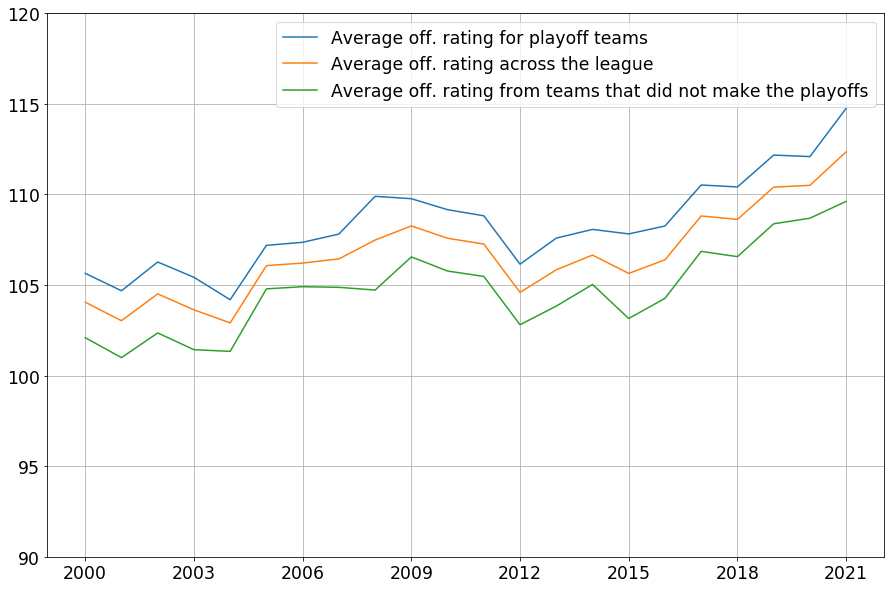

In [25]:
plt.figure(figsize=(15,10))


plt.grid()
plt.plot(SEASONS, avg_off_rtgs_playoffs, label='Average off. rating for playoff teams')
plt.plot(SEASONS, avg_off_ratings, label='Average off. rating across the league')
plt.plot(SEASONS, avg_off_rtgs_non_playoffs, label='Average off. rating from teams that did not make the playoffs')
plt.xticks([2000,2003,2006,2009,2012,2015,2018,2021])
plt.yticks([90.0, 95.0, 100.0, 105.0, 110.0, 115.0, 120.0])
plt.legend()
plt.show()

In [20]:
growth_rate(avg_off_ratings)

'0.37%'

In [21]:
growth_rate([o for o, _ in diffs_rtg])

'4.94%'

In [22]:
growth_rate([d for _, d in diffs_rtg])

'-0.28%'

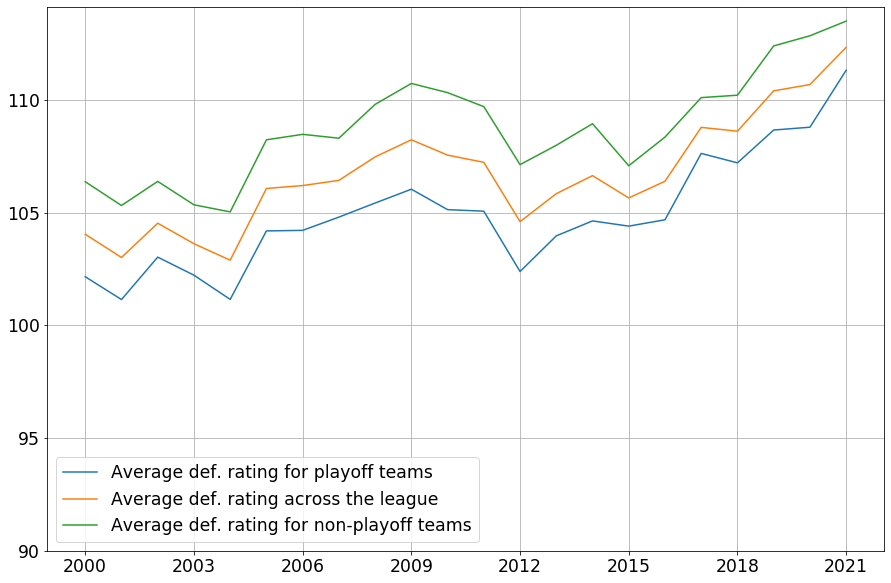

In [26]:
plt.figure(figsize=(15,10))


plt.grid()
plt.plot(SEASONS, avg_def_rtgs_playoffs, label='Average def. rating for playoff teams')
plt.plot(SEASONS, avg_def_ratings, label='Average def. rating across the league')
plt.plot(SEASONS, avg_def_rtgs_non_playoffs, label='Average def. rating for non-playoff teams')
plt.xticks([2000,2003,2006,2009,2012,2015,2018,2021])
plt.yticks([90.0, 95.0, 100.0, 105.0, 110.0])
plt.legend()
plt.show()

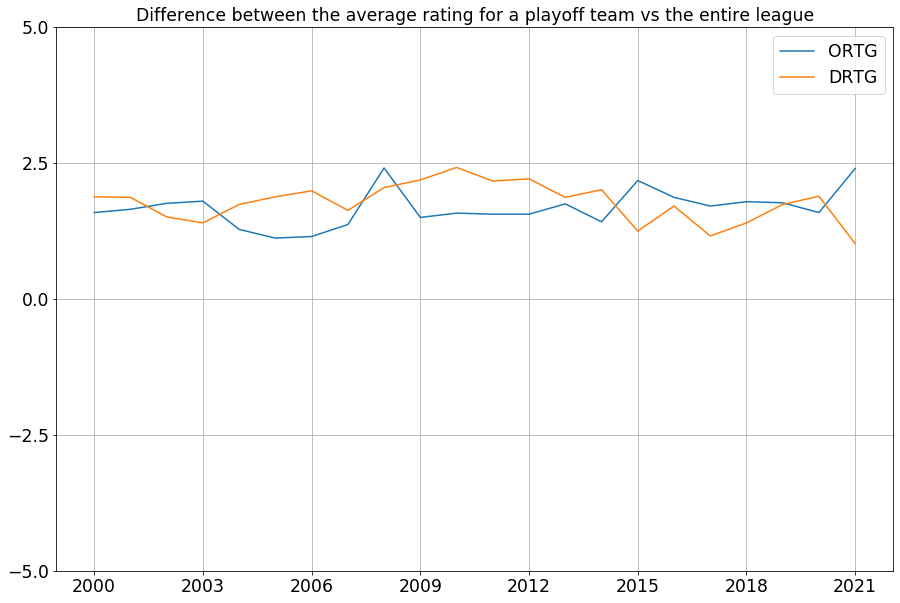

In [27]:
plt.figure(figsize=(15,10))

plt.grid()
plt.plot(SEASONS, [o for o, _ in diffs_rtg], label='ORTG')
plt.plot(SEASONS, [-d for _, d in diffs_rtg], label='DRTG')
plt.title("Difference between the average rating for a playoff team vs the entire league")
plt.xticks([2000,2003,2006,2009,2012,2015,2018,2021])
plt.yticks([-5.0, -2.5, 0.0, 2.5, 5.0])
plt.legend()
plt.show()